In [3]:
# Standard libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Hugging Face library for loading datasets
from datasets import load_dataset


In [4]:
file_path_to_data = "/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data"
dataset = load_dataset("imagefolder", data_dir=file_path_to_data)

Resolving data files: 100%|██████████| 814/814 [00:00<00:00, 5938.35it/s]
Found cached dataset imagefolder (/Users/saminrazeghi/.cache/huggingface/datasets/imagefolder/default-ed4caee83bcf4d62/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 1/1 [00:00<00:00, 14.72it/s]


In [5]:
# Convert dataset to a DataFrame for merging
image_paths = [item['image'].filename for item in dataset['train']]
image_paths

['/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/10728036/142859125/1.png',
 '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/10728036/142859125/10.png',
 '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/10728036/142859125/11.png',
 '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/10728036/142859125/12.png',
 '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/10728036/142859125/13.png',
 '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Da

In [6]:
# Initialize an empty list to store extracted data
image_data = []

# Loop through each file path and extract study_id and series_id
for path in image_paths:
    # Split the path by '/' to extract the relevant parts
    parts = path.split('/')

    # Extract the study_id and series_id (study_id is second-to-last, series_id is before file_name)
    study_id = parts[-3]  # The 3rd-to-last part is the study_id
    series_id = parts[-2]  # The 2nd-to-last part is the series_id

    # Append to the list
    image_data.append({'study_id': study_id, 'series_id': series_id, 'file_path': path})

# Convert the list of dictionaries to a pandas DataFrame
image_df = pd.DataFrame(image_data)

# Display the resulting DataFrame
image_df.head()

,study_id,series_id,file_path
0,10728036,142859125,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
1,10728036,142859125,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
2,10728036,142859125,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
3,10728036,142859125,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
4,10728036,142859125,/Users/saminrazeghi/Documents/Samin/TMU/Semest...


In [7]:
coordinates_path = '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Coordinates.csv'
label_coordinates_df = pd.read_csv(coordinates_path)

In [8]:
label_coordinates_df

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333


In [9]:
train_path = '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/train.csv'
train_df = pd.read_csv(train_path)

In [10]:
train_df

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [11]:
# Example DataFrames
# train_df - already has columns for conditions at different levels
# label_coordinates_df - has study_id, condition, level, x, y

# Merge the DataFrames on 'study_id'
merged_df11 = pd.merge(label_coordinates_df, train_df, on='study_id', how='left')

# Now, for each row in merged_df, we want to map the condition and level to the corresponding value in train_df.
# We need to map 'condition' and 'level' to the right columns in 'train_df'.

def map_condition_to_value(row):
    condition = row['condition']
    level = row['level']

    # Define the mapping of condition and level to the corresponding column in train_df
    condition_column = f'{condition.lower().replace(" ", "_")}_{level.lower().replace("/", "_").replace(" ", "_")}'

    # Return the value from the corresponding column in train_df
    return row[condition_column]

# Apply the function to add the condition-level value to the merged DataFrame
merged_df11['condition_level_value'] = merged_df11.apply(map_condition_to_value, axis=1)

In [12]:
merged_df11

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,condition_level_value
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild


In [13]:
# Assuming label_coordinates_df and train_df are already loaded

# Define a function to map condition and level to the corresponding column in train_df
def get_condition_level_value(row, train_df):
    condition = row['condition']
    level = row['level']

    # Create the column name dynamically from condition and level
    column_name = f'{condition.lower().replace(" ", "_")}_{level.lower().replace("/", "_").replace(" ", "_")}'

    # Check if the column exists in train_df, and return the corresponding value
    if column_name in train_df.columns:
        # Since train_df contains one row per study_id, we can get the value for the study_id
        return train_df.loc[train_df['study_id'] == row['study_id'], column_name].values[0]
    else:
        return None  # Return None if no matching column is found

# Apply the function to label_coordinates_df to create the new column
label_coordinates_df['condition_level_value'] = label_coordinates_df.apply(
    lambda row: get_condition_level_value(row, train_df), axis=1
)

In [14]:
label_coordinates_df

,study_id,series_id,instance_number,condition,level,x,y,condition_level_value
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild
...,...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild


In [16]:
# Convert 'study_id' and 'series_id' to string type for both DataFrames
label_coordinates_df['study_id'] = label_coordinates_df['study_id'].astype(str)
label_coordinates_df['series_id'] = label_coordinates_df['series_id'].astype(str)
image_df['study_id'] = image_df['study_id'].astype(str)
image_df['series_id'] = image_df['series_id'].astype(str)

# Merge image_df with label_coordinates_df on 'study_id' and 'series_id'
merged_df = pd.merge(label_coordinates_df, image_df, on=['study_id', 'series_id'], how='left')

In [17]:
merged_df

,study_id,series_id,instance_number,condition,level,x,y,condition_level_value,file_path
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
1,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
2,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
3,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
4,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,/Users/saminrazeghi/Documents/Samin/TMU/Semest...
...,...,...,...,...,...,...,...,...,...
54703,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild,NaN
54704,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild,NaN
54705,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild,NaN
54706,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild,NaN


In [18]:
# Reorder columns: Put 'file_path' at the first position, followed by other columns
cols = ['file_path'] + [col for col in merged_df.columns if col != 'file_path']
merged_df1 = merged_df[cols]

In [19]:
merged_df1

,file_path,study_id,series_id,instance_number,condition,level,x,y,condition_level_value
0,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
1,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
2,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
3,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
4,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
...,...,...,...,...,...,...,...,...,...
54703,NaN,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild
54704,NaN,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild
54705,NaN,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild
54706,NaN,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild


In [20]:
# Remove rows where 'file_path' is NaN
merged_df2 = merged_df1.dropna(subset=['file_path'])

In [21]:
merged_df2

,file_path,study_id,series_id,instance_number,condition,level,x,y,condition_level_value
0,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
1,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
2,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
3,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
4,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
...,...,...,...,...,...,...,...,...,...
6261,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,26342422,2528347280,9,Spinal Canal Stenosis,L5/S1,215.740072,266.685921,Normal/Mild
6262,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,26342422,2528347280,9,Spinal Canal Stenosis,L5/S1,215.740072,266.685921,Normal/Mild
6263,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,26342422,2528347280,9,Spinal Canal Stenosis,L5/S1,215.740072,266.685921,Normal/Mild
6264,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,26342422,2528347280,9,Spinal Canal Stenosis,L5/S1,215.740072,266.685921,Normal/Mild


In [22]:
merged_df3 = merged_df2.rename(columns={'file_path': 'file_name'})

In [24]:
# Save the DataFrame to a CSV file
merged_df3.to_csv('/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/metadata.csv', index=False)

print("DataFrame saved to 'metadata.csv'")

DataFrame saved to 'metadata.csv'


In [25]:
# Assuming your merged DataFrame is named merged_df
# Path to an example record
image_path_to_find = '/Users/saminrazeghi/Documents/Samin/TMU/SemesterOne-Fall2024/ComputerVision/rsna-2024-lumbar-spine-degenerative-classification/test_Code/Data/4003253/702807833/1.png'

# Find the record where 'file_path' matches the image path
record = merged_df3[merged_df3['file_name'] == image_path_to_find]

# Display the result
record

,file_name,study_id,series_id,instance_number,condition,level,x,y,condition_level_value
0,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
15,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild
30,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild
45,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild
60,/Users/saminrazeghi/Documents/Samin/TMU/Semest...,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild


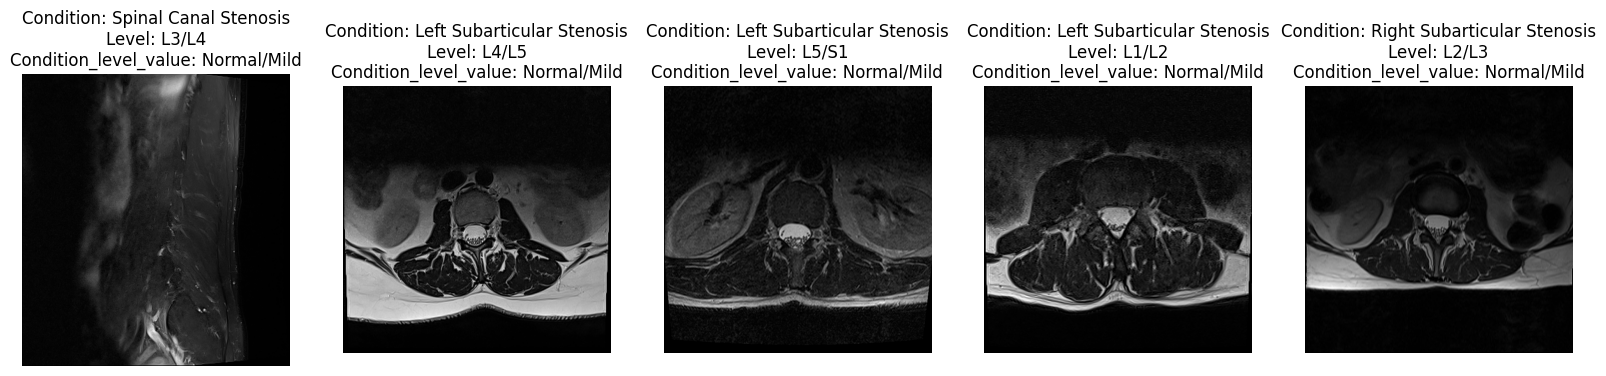

In [26]:
# Sample 5 random rows from the merged_df3 dataframe
sampled_df = merged_df3.sample(n=5, random_state=42)

# Create a plot to display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Loop through each sampled row
for i, (index, row) in enumerate(sampled_df.iterrows()):
    # Load the image using PIL
    image = Image.open(row['file_name'])

    # Display the image on the corresponding axis
    axes[i].imshow(image)
    axes[i].axis('off')

    # Display the condition as the label
    axes[i].set_title(f"Condition: {row['condition']}\nLevel: {row['level']}\nCondition_level_value: {row['condition_level_value']}")

plt.show()